## Чтение данных

In [ ]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from io import StringIO
import requests
import pandas as pd
archive_url = "https://archive.ics.uci.edu/static/public/759/glioma+grading+clinical+and+mutation+features+dataset.zip"
request_content = requests.get(archive_url).content
str_stream = StringIO(request_content.split(b"TCGA_GBM_LGG_Mutations_all.csv")[1][3:].split(b"{")[0].rsplit(b'PK', 1)[0].decode('utf-8'))
dataset = pd.read_csv(str_stream)
dataset.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

In [ ]:
unique_values = dataset.apply(lambda col: col.unique())
print(unique_values)

Grade                                                       [LGG, GBM]
Project                                           [TCGA-LGG, TCGA-GBM]
Case_ID              [TCGA-DU-8164, TCGA-QH-A6CY, TCGA-HW-A5KM, TCG...
Gender                                              [Male, Female, --]
Age_at_diagnosis     [51 years 108 days, 38 years 261 days, 35 year...
Primary_Diagnosis    [Oligodendroglioma, NOS, Mixed glioma, Astrocy...
Race                 [white, asian, black or african american, --, ...
IDH1                                            [MUTATED, NOT_MUTATED]
TP53                                            [NOT_MUTATED, MUTATED]
ATRX                                            [NOT_MUTATED, MUTATED]
PTEN                                            [NOT_MUTATED, MUTATED]
EGFR                                            [NOT_MUTATED, MUTATED]
CIC                                             [NOT_MUTATED, MUTATED]
MUC16                                           [NOT_MUTATED, MUTATED]
PIK3CA

In [ ]:
features = [
    'Grade',
    'Project',
    'Case_ID',
    'Gender',
    'Age_at_diagnosis',
    'Primary_Diagnosis',
    'Race',
    'IDH1',
    'TP53',
    'ATRX',
    'PTEN',
    'EGFR',
    'CIC',
    'MUC16',
    'PIK3CA',
    'NF1',
    'PIK3R1',
    'FUBP1',
    'RB1',
    'NOTCH1',
    'BCOR',
    'CSMD3',
    'SMARCA4',
    'GRIN2A',
    'IDH2',
    'FAT4',
    'PDGFRA',
]

descriptions = [
    'ТАРГЕТ - градации опухоли (Низкодифференцированная глиома, Глиобластома мультиформа)',
    'проект глиомы мозга, в котором собирались данные, категориальный',
    'уникальный идентификатор случая пациента, идентификационный',
    'пол пациента, категориальный',
    'возраст пациента, когда поставили диагноз, числовой',
    'первичный диагноз, категориальный',
    'раса пациента, категориальный',
    'бинарный признак мутации гена IDH1 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена TP53 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена ATRX (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена PTEN (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена EGFR (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена CIC (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена MUC16 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена PIK3CA (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена NF1 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена PIK3R1 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена FUBP1 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена RB1 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена NOTCH1 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена BCOR (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена CSMD3 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена SMARCA4 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена GRIN2A (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена IDH2 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена FAT4 (содержит мутацию/не содержит мутаций)',
    'бинарный признак мутации гена PDGFRA (содержит мутацию/не содержит мутаций)'
]

df_descr = pd.DataFrame({
    "Фича": features,
    "Описание": descriptions
})

df_descr

,Фича,Описание
0,Grade,ТАРГЕТ - градации опухоли (Низкодифференцирова...
1,Project,"проект глиомы мозга, в котором собирались данн..."
2,Case_ID,"уникальный идентификатор случая пациента, иден..."
3,Gender,"пол пациента, категориальный"
4,Age_at_diagnosis,"возраст пациента, когда поставили диагноз, чис..."
5,Primary_Diagnosis,"первичный диагноз, категориальный"
6,Race,"раса пациента, категориальный"
7,IDH1,бинарный признак мутации гена IDH1 (содержит м...
8,TP53,бинарный признак мутации гена TP53 (содержит м...
9,ATRX,бинарный признак мутации гена ATRX (содержит м...



Если посмотреть на наши переменные, мы можем предположить, что Grade напрямую кореллирует с Project, так же как и Grade с Primary_Diagnosis, а Case_ID не будет иметь корреляции с данными, так как это просто уникальный идентификатор.
(так как у нас данные типа object преобразуем их в int). Найдем корреляцию среди признаков, относительно таргета. Визуализируем тепловую карту и поймем, верны ли наши предположения, и какие признаки будут сильнее влиять на нашу модель, а какие меньше.

# Приводим возраст пациента к числовому виду

In [ ]:
import re

data = dataset.copy()

def age_number(age):
    num = re.findall(r"\d+", age)
    if len(num) == 0:
        return None
    elif len(num) == 1:
        year = int(num[0])
        days = 0
    elif len(num) == 2:
        year = int(num[0])
        days = int(num[1])
    result = (days / 365.0) + year
    return result

data['Age_at_diagnosis'] = data['Age_at_diagnosis'].map(age_number)

# Кодируем остальные признаки с помощью мар

In [ ]:
data['Grade'] = data['Grade'].map({"LGG" : 0, "GBM" : 1})
data['Project'] = data['Project'].map({"TCGA-LGG" : 0, "TCGA-GBM" : 1})
data['Gender'] = data['Gender'].map({"Male" : 0, "Female" : 1, "--" : 2})

gen=['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
     'CIC', 'MUC16', 'PIK3CA', 'NF1',
     'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
     'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
for col in gen:
    data[col] = data[col].map({"NOT_MUTATED" : 0, "MUTATED" : 1})

data

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,TCGA-DU-8164,0,51.295890,"Oligodendroglioma, NOS",white,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,TCGA-QH-A6CY,0,38.715068,Mixed glioma,white,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,TCGA-HW-A5KM,0,35.169863,"Astrocytoma, NOS",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,TCGA-E1-A7YE,1,32.775342,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,TCGA-S9-A6WG,0,31.512329,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,TCGA-19-5959,1,77.890411,Glioblastoma,white,0,0,0,...,0,0,0,0,0,0,0,0,0,0
858,1,1,TCGA-16-0846,0,85.178082,Glioblastoma,white,0,1,0,...,0,0,0,0,0,0,0,0,0,0
859,1,1,TCGA-28-1746,1,77.487671,Glioblastoma,white,0,1,0,...,0,0,0,0,0,0,0,0,0,0
860,1,1,TCGA-32-2491,0,63.331507,Glioblastoma,white,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Кодируем признаки с помощью LabelEncoder и OneHotEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
Hot = OneHotEncoder(drop = "first", handle_unknown = 'ignore', sparse_output = False)

data['Case_ID'] = le.fit_transform(data['Case_ID'])

Hot_race = Hot.fit_transform(data[['Race']])
data_hot_race = pd.DataFrame(Hot_race.astype(int), columns=Hot.get_feature_names_out(['Race']))

Hot_diagnosis = Hot.fit_transform(data[['Primary_Diagnosis']])
data_hot_diagnosis = pd.DataFrame(Hot_diagnosis.astype(int), columns=Hot.get_feature_names_out(['Primary_Diagnosis']))

data = pd.concat([data, data_hot_race, data_hot_diagnosis], axis=1)
data.drop(columns=['Race', 'Primary_Diagnosis'], inplace=True)

data

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,...,Race_asian,Race_black or african american,Race_not reported,Race_white,"Primary_Diagnosis_Astrocytoma, NOS","Primary_Diagnosis_Astrocytoma, anaplastic",Primary_Diagnosis_Glioblastoma,Primary_Diagnosis_Mixed glioma,"Primary_Diagnosis_Oligodendroglioma, NOS","Primary_Diagnosis_Oligodendroglioma, anaplastic"
0,0,0,480,0,51.295890,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,732,0,38.715068,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,692,0,35.169863,1,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,518,1,32.775342,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,775,0,31.512329,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,233,1,77.890411,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
858,1,1,196,0,85.178082,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
859,1,1,266,1,77.487671,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
860,1,1,300,0,63.331507,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# Визуализируем корреляцию между данными с помощью тепловой карты

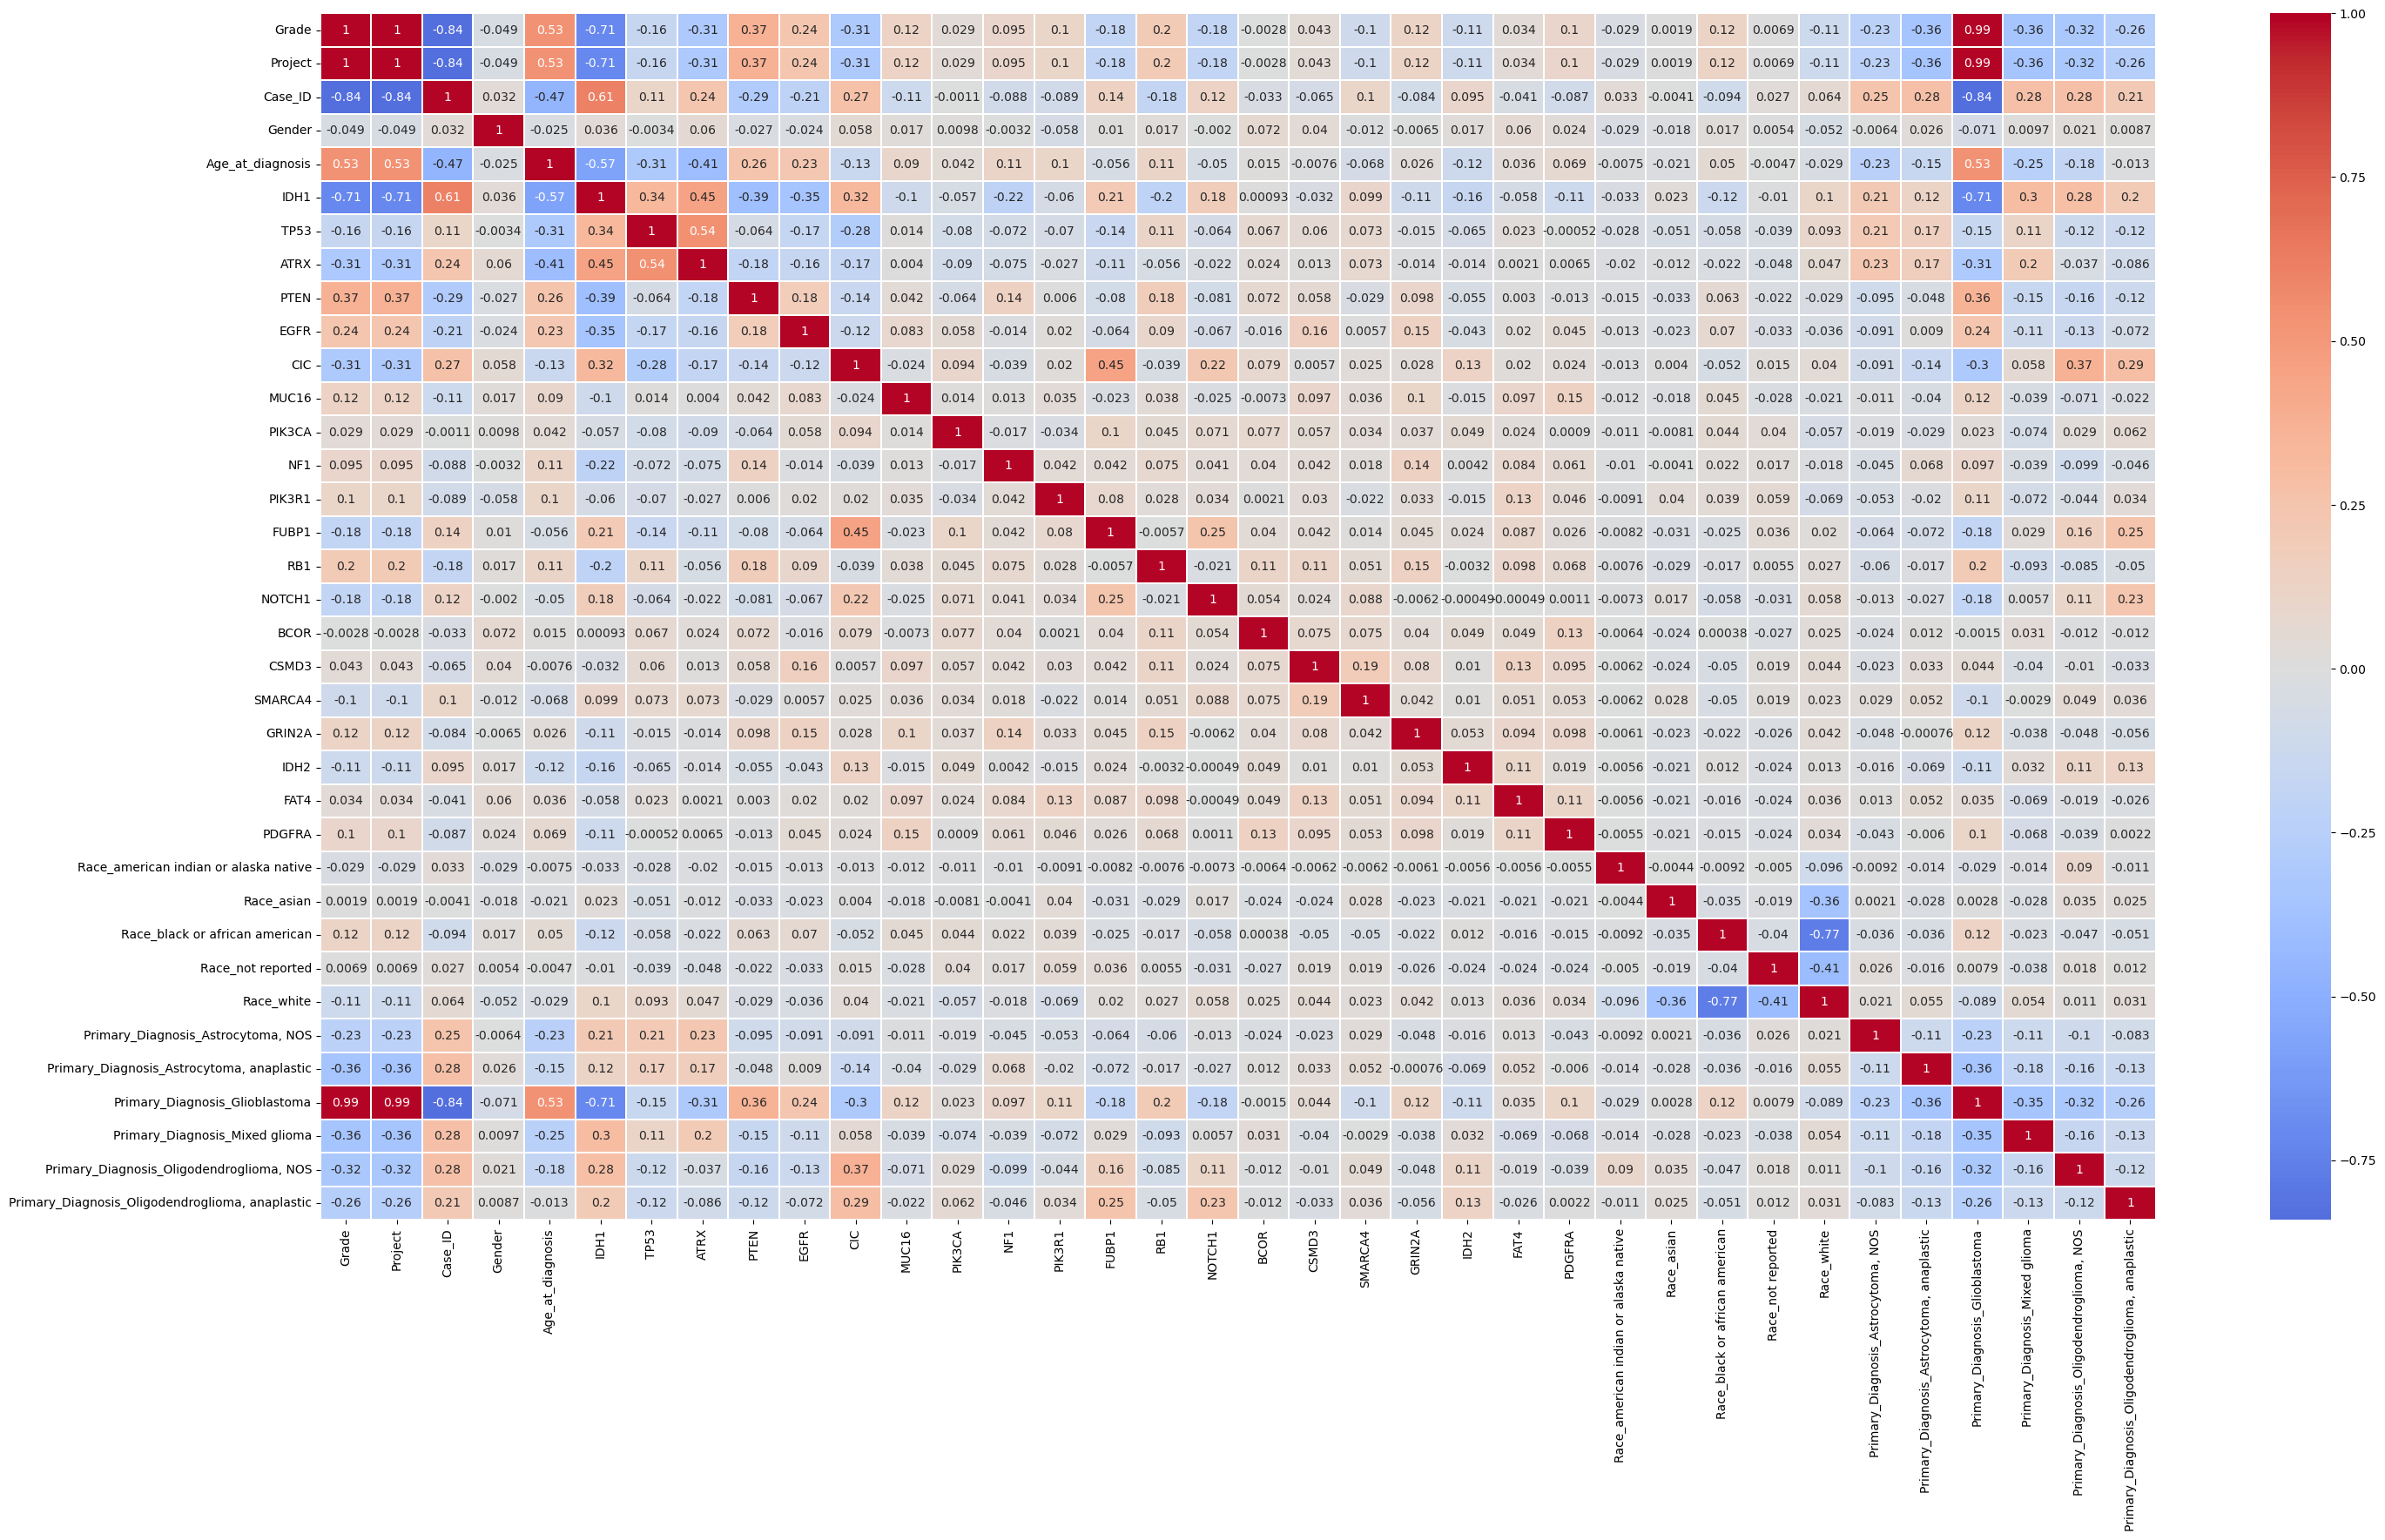

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
_, ax = plt.subplots(figsize=(34,18))
sns.heatmap(data.corr(), center=0, annot=True, linewidth=.2, ax=ax, cmap='coolwarm');


In [ ]:
"""
исходя из визуализации тепловой карты мы можем понять, что больше всего с зависимой переменной коррелируют переменные:
Project, Primary_Diagnosis_Glioblastoma
Project идентична таргету, поэтому не будет смысла брать ее в расчет при обучении модели
IDH1 коррелирует отрицательно с таргетом
таким образом, наши гепотезы частично подтвердились, при кодировании Primary_Diagnosis, мы выяснили, что
не все значения сильно коррелируют с зависимой переменной
"""

In [ ]:
# смотрим сколько пропущенных значений
missing_val = data.isna().sum()
print(missing_val[missing_val>0])

Age_at_diagnosis    5
dtype: int64


# Так как пропущенных значений очень мало, я решила их удалить, а не заполнять

In [ ]:
data = data.dropna(subset=['Age_at_diagnosis'])

# Визуализируем данные при помощи TSNE

Text(0.5, 1.0, 'T-sne visualization')

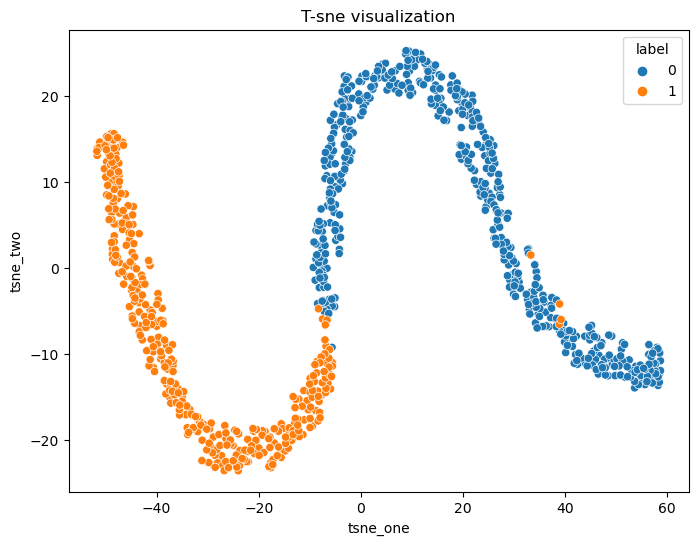

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)
tsne_result = tsne.fit_transform(data)

tsne_df = pd.DataFrame({
    'tsne_one': tsne_result[:, 0],
    'tsne_two': tsne_result[:, 1],
    'label': data['Grade']
})

plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'tsne_one', y ='tsne_two', data = tsne_df, hue = 'label')

plt.title("T-sne visualization")

In [ ]:
X = data.copy()
y = X["Grade"]
X = X.drop(columns = ["Grade", "Case_ID","Project","Primary_Diagnosis_Glioblastoma"])
X.head()

,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_not reported,Race_white,"Primary_Diagnosis_Astrocytoma, NOS","Primary_Diagnosis_Astrocytoma, anaplastic",Primary_Diagnosis_Mixed glioma,"Primary_Diagnosis_Oligodendroglioma, NOS","Primary_Diagnosis_Oligodendroglioma, anaplastic"
0,0,51.295890,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,38.715068,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,35.169863,1,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,1,32.775342,1,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,31.512329,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


# Разделяем выборку на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Стандартизируем данные, так как некоторые модели чувствительны к масштабу

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

# Создаем функцию вывода метрик качества

In [ ]:
from sklearn import metrics

def metrix(y_test, y_pred):
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
    print(f"F1 Score: {metrics.f1_score(y_test, y_pred)}")

In [ ]:
#pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb

# Логистическа регрессия

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaler, y_train)
y_pred_logistic = lr.predict(X_test_scaler)
metrix(y_test, y_pred_logistic)

# такие метрики могли получится, потому что наши данные хорошо линейно разделимы,
# метрики настолько хорошие, что хочется удостовериться в правильности решения,
# обучим другие модели и посмотрим на их метрики

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Метод опорных векторов

In [ ]:
svm = SVC()
svm.fit(X_train_scaler, y_train)
y_pred_svm = svm.predict(X_test_scaler)
metrix(y_test, y_pred_svm)

Accuracy: 0.9767441860465116
Precision: 0.9864864864864865
Recall: 0.9605263157894737
F1 Score: 0.9733333333333333


# Дерево решений

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaler, y_train)
y_pred_dt = dt.predict(X_test_scaler)
metrix(y_test, y_pred_dt)

Accuracy: 0.9825581395348837
Precision: 0.9866666666666667
Recall: 0.9736842105263158
F1 Score: 0.9801324503311258


# Случайный лес

In [ ]:
rf = RandomForestClassifier(100, min_samples_leaf = 5)
rf.fit(X_train_scaler, y_train)
y_pred_rf = rf.predict(X_test_scaler)
metrix(y_test, y_pred_rf)

Accuracy: 0.9825581395348837
Precision: 0.9866666666666667
Recall: 0.9736842105263158
F1 Score: 0.9801324503311258


# ХGBoost

In [ ]:
xgb = xgb()
xgb.fit(X_train_scaler, y_train)
y_pred_xgb = xgb.predict(X_test_scaler)
metrix(y_test, y_pred_xgb)

Accuracy: 0.9883720930232558
Precision: 0.9868421052631579
Recall: 0.9868421052631579
F1 Score: 0.9868421052631579


In [ ]:
# я не стала использовать настройки гиперпараметров, потому что у нас очень высокие метрики с базовыми гиперпараметрами

In [ ]:
# изначально я удалила только фичи Grade и Case_ID, при этом у нас на большинстве моделей получались идеальные метрики
# я решила удалить сильно коррелирующие фичи дополнительно, чтобы модель имела смысл

In [ ]:
# Вывод: мы проанализировали данные и обучили на них разные модели, чтобы выявить лучшую
# исходя из метрик: логистическая регрессия идеально разделяет наши данные, на втором месте - XGBClassifier
# Данные хорошо разделимы на классы, поэтому такая простая модель как логистическая регрессия
# очень хорошо пожходит для решения нашей задачи